# Importimised

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
#!pip install pandas openpyxl

In [27]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000


# sisselugemised

In [2]:
#excel file 1
EEB_samples = pd.ExcelFile('EEB_samples.xlsx') #file

sample = EEB_samples.parse('full_table') #sheet name
#samples_reynoutria = EEB_samples.parse('reynoutria') 
#samples_solidago = EEB_samples.parse('solidago') 

#excel file 2
EEB_soil_chemistry = pd.ExcelFile('EEB_soil_chemistry.xlsx')

soil = EEB_soil_chemistry.parse('Sheet1')

#excel file 3
plant_survey = pd.ExcelFile('Plant_survey_2023_final.xlsx') 

plant = plant_survey.parse('Sheet1')

### eemaldame soil failist ühikute rea

In [3]:
soil=soil.iloc[1:] #eemaldasin ühikute rea
soil= soil.reset_index(drop=True)

# asjalik

# keskmised

 - 123 inv
 - 456trans
 - 789nat

EEB-RJ1-1  

RJ taga indeks on 1 kuni 13


EEB-SC1-1

SC taga indeks 1 kuni 11


viimane indeks 1-9 kõigil

In [5]:
#muudame nimesid
for i in range (1,14):
    for j in range(1,10):
        plant[plant['sample']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'INV{}-R'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'TRANS{}-R'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'NAT{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        plant[plant['sample']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'INV{}-S'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'TRANS{}-S'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'NAT{}-S'.format(i)

In [6]:
plant.tail(20)

,sample,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,...,Plantago_lanceolata,Daucus_carota,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba
196,NAT9-S,0,0,20.0,0.0,1.0,0.0,0.0,9.0,0.0,...,0,0,0,0,4,0,0,0,0,0
197,NAT9-S,0,0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,...,0,0,1,0,10,0,0,0,0,0
198,INV13-R,100,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
199,INV13-R,75,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
200,INV13-R,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
201,TRANS13-R,3,0,99.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
202,TRANS13-R,5,0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
203,TRANS13-R,10,0,99.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
204,NAT13-R,0,0,100.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
205,NAT13-R,0,0,100.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
mean_df = plant.groupby('sample').mean()

In [8]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Plantago_lanceolata,Daucus_carota,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba
sample,,,,,,,,,,,,,,,,,,,,,
INV1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [9]:

kogu_katvus=mean_df.T.sum()
kogu_katvus

sample
INV1-R      105.166667
INV1-S       91.666667
INV10-R      77.000000
INV10-S      96.333333
INV11-R      99.333333
               ...    
TRANS7-S     87.000000
TRANS8-R     73.333333
TRANS8-S     88.000000
TRANS9-R    119.333333
TRANS9-S     32.000000
Length: 72, dtype: float64

In [10]:
invasiivsed=mean_df[['Reynoutria_japonica', 'Solidago_canadensis']]
invasiivsed

,Reynoutria_japonica,Solidago_canadensis
sample,,
INV1-R,86.666667,0.000000
INV1-S,0.000000,0.000000
INV10-R,71.666667,0.000000
INV10-S,0.000000,87.333333
INV11-R,91.666667,0.000000
...,...,...
TRANS7-S,0.000000,25.000000
TRANS8-R,25.000000,0.000000
TRANS8-S,0.000000,30.000000


In [11]:
tavalised=mean_df.drop(['Reynoutria_japonica', 'Solidago_canadensis'],axis=1)
tavaliste_katvus=tavalised.T.sum()


In [12]:
invasiivsete_katvus=invasiivsed.T.sum()
invasiivsete_katvus

sample
INV1-R      86.666667
INV1-S       0.000000
INV10-R     71.666667
INV10-S     87.333333
INV11-R     91.666667
              ...    
TRANS7-S    25.000000
TRANS8-R    25.000000
TRANS8-S    30.000000
TRANS9-R    25.000000
TRANS9-S    11.333333
Length: 72, dtype: float64

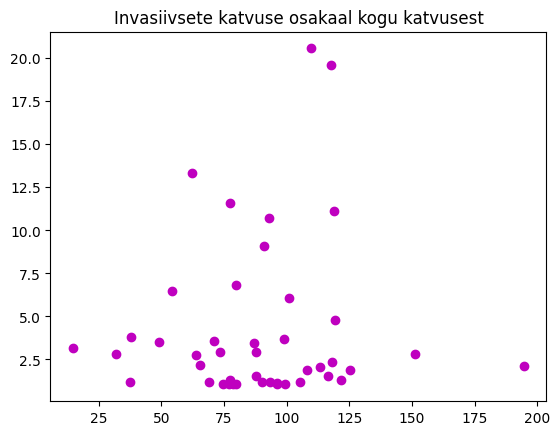

In [13]:
plt.plot(kogu_katvus,kogu_katvus/invasiivsete_katvus,'mo')
plt.title('Invasiivsete katvuse osakaal kogu katvusest')
plt.show()

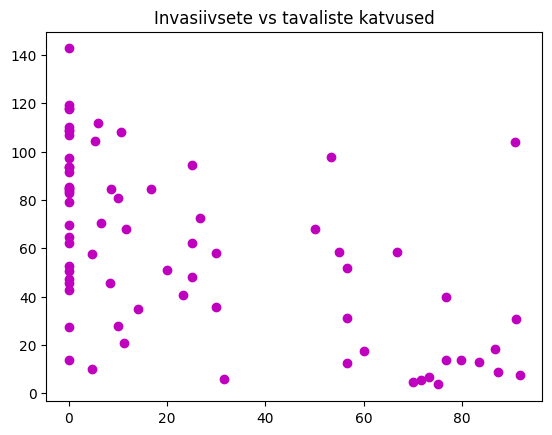

In [14]:
plt.plot(invasiivsete_katvus,tavaliste_katvus,'mo')
plt.title('Invasiivsete vs tavaliste katvused')
plt.show()

In [15]:
data = np.vstack((tavaliste_katvus, invasiivsete_katvus))
dissimilarity = pairwise_distances(data, metric='euclidean')

# Print dissimilarity matrix
print(dissimilarity)


[[  0.         585.74481635]
 [585.74481635   0.        ]]


In [16]:
#data=pd.concat([invasiivsed,tavalised],axis=1)


In [33]:
#mean_df=mean_df.T
distances = pairwise_distances(mean_df.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df = pd.DataFrame(distances, index=mean_df.index, columns=mean_df.index)
distances_df

sample,INV1-R,INV1-S,INV10-R,INV10-S,INV11-R,INV11-S,INV12-R,INV13-R,INV2-R,INV2-S,...,TRANS5-R,TRANS5-S,TRANS6-R,TRANS6-S,TRANS7-R,TRANS7-S,TRANS8-R,TRANS8-S,TRANS9-R,TRANS9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV1-R,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
INV1-S,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
INV10-R,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
INV10-S,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
INV11-R,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS7-S,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
TRANS8-R,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
TRANS8-S,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177


C:\Anaconda\envs\IDS\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


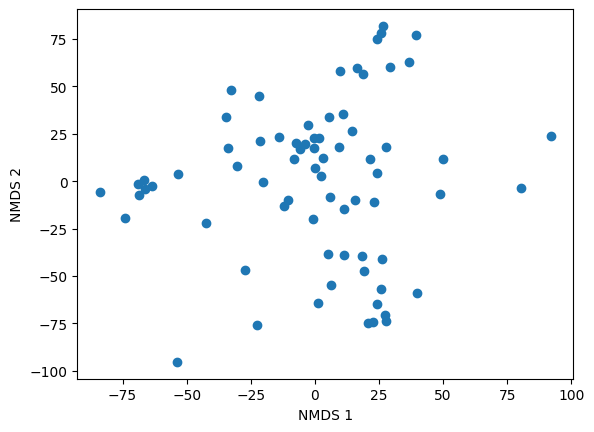

In [34]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(distances_df)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.show()

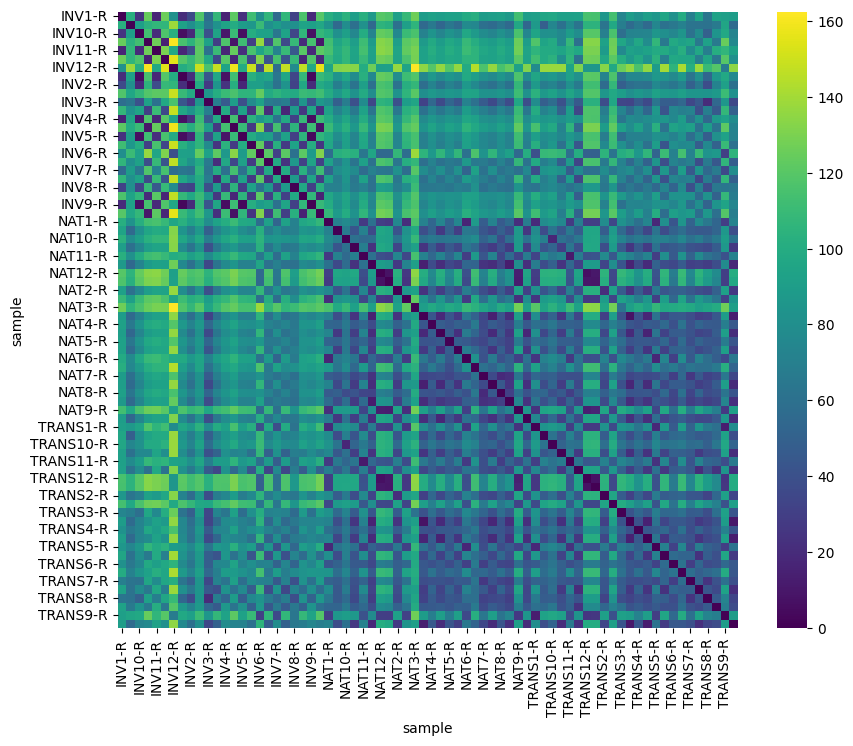

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distances_df' is your DataFrame with the pairwise distances
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df, cmap='viridis')
plt.show()

In [22]:
distances1 = pairwise_distances(invasiivsed.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df1 = pd.DataFrame(distances1, index=invasiivsed.index, columns=invasiivsed.index)
distances_df1

sample,INV1-R,INV1-S,INV10-R,INV10-S,INV11-R,INV11-S,INV12-R,INV13-R,INV2-R,INV2-S,...,TRANS5-R,TRANS5-S,TRANS6-R,TRANS6-S,TRANS7-R,TRANS7-S,TRANS8-R,TRANS8-S,TRANS9-R,TRANS9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV1-R,0.000000,86.666667,15.000000,123.037483,5.000000,125.666667,4.000000,11.666667,30.000000,86.666667,...,75.000000,90.676470,76.666667,86.922699,66.666667,90.200394,61.666667,91.712110,61.666667,87.404551
INV1-S,86.666667,0.000000,71.666667,87.333333,91.666667,91.000000,90.666667,75.000000,56.666667,0.000000,...,11.666667,26.666667,10.000000,6.666667,20.000000,25.000000,25.000000,30.000000,25.000000,11.333333
INV10-R,15.000000,71.666667,0.000000,112.974432,20.000000,115.832254,19.000000,3.333333,15.000000,71.666667,...,60.000000,76.467132,61.666667,71.976076,51.666667,75.901984,46.666667,77.692413,46.666667,72.557257
INV10-S,123.037483,87.333333,112.974432,0.000000,126.609197,3.666667,125.887075,115.117814,104.106783,87.333333,...,88.109149,60.666667,87.903988,80.666667,89.594147,62.333333,90.841131,57.333333,90.841131,76.000000
INV11-R,5.000000,91.666667,20.000000,126.609197,0.000000,129.165699,1.000000,16.666667,35.000000,91.666667,...,80.000000,95.466690,81.666667,91.908771,71.666667,95.014619,66.666667,96.450909,66.666667,92.364616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS7-S,90.200394,25.000000,75.901984,62.333333,95.014619,66.000000,94.050223,79.056942,61.936347,25.000000,...,27.588242,1.666667,26.925824,18.333333,32.015621,0.000000,35.355339,5.000000,35.355339,13.666667
TRANS8-R,61.666667,25.000000,46.666667,90.841131,66.666667,94.371606,65.666667,50.000000,31.666667,25.000000,...,13.333333,36.552854,15.000000,25.873624,5.000000,35.355339,0.000000,39.051248,0.000000,27.448943
TRANS8-S,91.712110,30.000000,77.692413,57.333333,96.450909,61.000000,95.501018,80.777472,64.117947,30.000000,...,32.188680,3.333333,31.622777,23.333333,36.055513,5.000000,39.051248,0.000000,39.051248,18.666667


In [23]:
distances2 = pairwise_distances(tavalised.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df2 = pd.DataFrame(distances2, index=tavalised.index, columns=tavalised.index)
distances_df2

sample,INV1-R,INV1-S,INV10-R,INV10-S,INV11-R,INV11-S,INV12-R,INV13-R,INV2-R,INV2-S,...,TRANS5-R,TRANS5-S,TRANS6-R,TRANS6-S,TRANS7-R,TRANS7-S,TRANS8-R,TRANS8-S,TRANS9-R,TRANS9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV1-R,0.000000,54.912810,18.848077,19.166667,16.104692,8.281505,81.405194,17.030202,21.014545,79.036384,...,41.799787,30.188758,28.089638,47.362960,18.553975,25.133532,14.182344,16.577260,66.836658,18.706060
INV1-S,54.912810,0.000000,55.583271,55.590267,55.086296,54.652945,104.351702,55.179002,56.354779,95.698891,...,73.449718,54.904462,63.903139,70.509653,59.270097,56.454997,55.938955,58.890199,92.220448,55.101422
INV10-R,18.848077,55.583271,0.000000,2.027588,2.886751,14.375906,99.809819,4.678556,11.161690,79.810540,...,60.251095,24.378953,42.619766,43.888748,32.295511,17.738846,17.508728,32.523496,85.245397,7.164728
INV10-S,19.166667,55.590267,2.027588,0.000000,3.620927,14.700718,99.881597,5.830952,11.691640,79.884987,...,60.326657,24.280765,42.746020,44.021459,32.400274,17.823206,17.416467,32.634338,85.277325,7.824463
INV11-R,16.104692,55.086296,2.886751,3.620927,0.000000,11.958261,97.131640,4.027682,11.245987,79.415574,...,57.540083,24.404007,40.283716,43.895077,29.955523,17.785762,15.719768,29.935115,82.545610,7.078920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS7-S,25.133532,56.454997,17.738846,17.823206,17.785762,21.903830,101.196179,17.272329,20.017354,80.775753,...,62.160858,23.354752,45.645981,44.892464,36.640900,0.000000,25.484200,35.922757,86.823576,16.931233
TRANS8-R,14.182344,55.938955,17.508728,17.416467,15.719768,12.124356,87.414085,17.919573,20.806650,79.875250,...,48.630980,30.459445,34.216630,47.526601,23.739325,25.484200,0.000000,24.301349,73.019023,18.941430
TRANS8-S,16.577260,58.890199,32.523496,32.634338,29.935115,21.730675,70.737386,31.007168,33.825122,81.582610,...,32.229645,39.427853,25.139610,54.172564,19.621417,35.922757,24.301349,0.000000,56.368825,32.173143


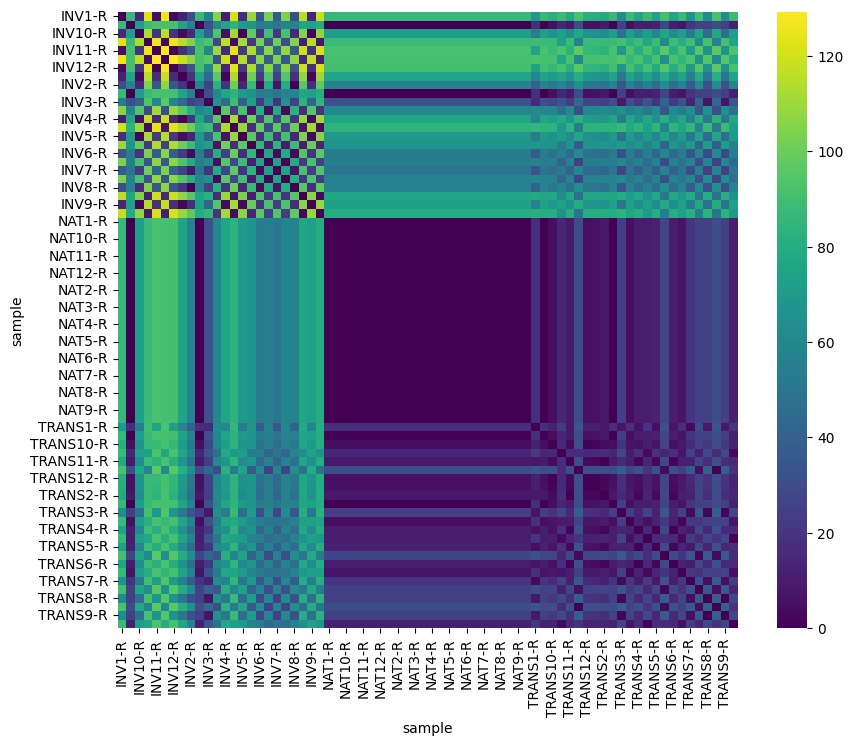

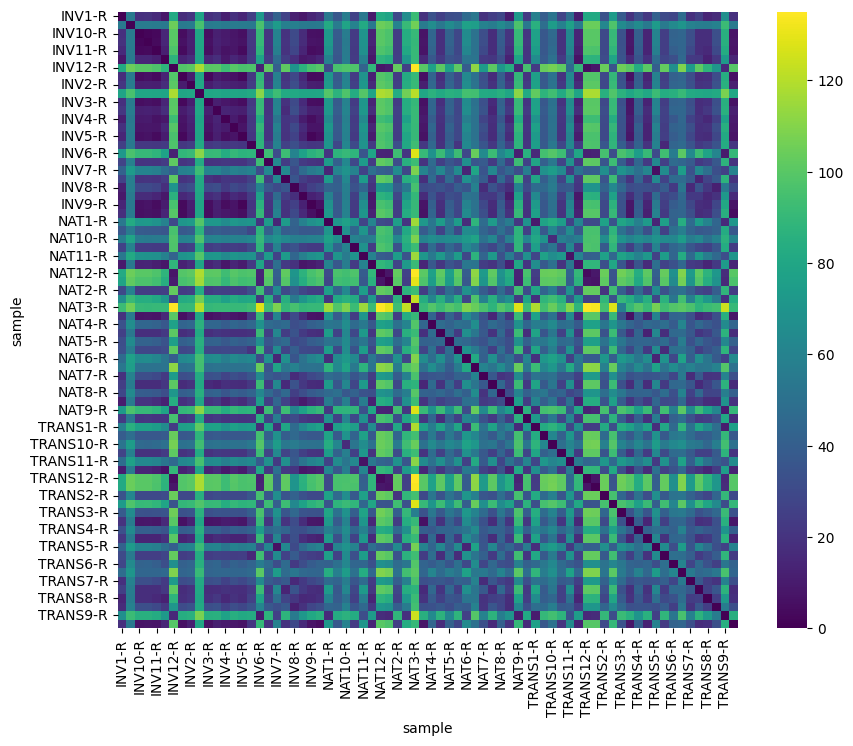

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df2, cmap='viridis')
plt.show()

# liigirikkus

In [35]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Plantago_lanceolata,Daucus_carota,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba
sample,,,,,,,,,,,,,,,,,,,,,
INV1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
